In [23]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
# one-hot encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import pathlib
import PIL
import numpy as np
import matplotlib.pyplot as plt 


In [4]:
leaf_folder = 'leaf_test/'

In [5]:
import os 
classes = []
for i in os.listdir(leaf_folder):
    classes.append(i)

In [6]:
print(classes)

['Acer_Campestre', 'Alnus_Sieboldiana', 'Cotinus_Coggygria', 'Eucalyptus_Glaucescens', 'Ginkgo_Biloba', 'Liriodendron_Tulipifera', 'Prunus_X_Shmittii', 'Quercus_Phellos', 'Quercus_x_Hispanica', 'Zelkova_Serrata']


In [7]:
leaf_folder_path = pathlib.Path(leaf_folder)
images = list(leaf_folder_path.glob('*/*'))
len(images)
image_size = (550,475)

In [35]:
train_ds = image_dataset_from_directory(
    leaf_folder_path,
    validation_split=0.3,
    batch_size = 30,
    subset = 'training', 
    label_mode = 'categorical',
    image_size=image_size,
    class_names =classes,
    seed = 12
)

Found 160 files belonging to 10 classes.
Using 112 files for training.


In [9]:
for images,labels in train_ds.take(1):
    first_set=images
    print(type(images))
first_set.shape

<class 'tensorflow.python.framework.ops.EagerTensor'>


TensorShape([30, 550, 475, 3])

In [10]:
val_ds = image_dataset_from_directory(
    leaf_folder_path,
    validation_split=0.3,
    subset="validation",
    label_mode = 'categorical',
    image_size=image_size,
    batch_size=30,
    class_names=classes,
    seed = 12
)

Found 160 files belonging to 10 classes.
Using 48 files for validation.


In [28]:
# this works well so far
data_augmentation=Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(550,475,3)),
    layers.experimental.preprocessing.RandomFlip('vertical',input_shape=(550,475,3)),    
])
#layers.experimental.preprocessing.RandomRotation(0.4),

In [49]:
model=Sequential([
     data_augmentation,
     layers.Conv2D(filters=10,kernel_size=(5,5),padding='same',activation='relu'),
     layers.MaxPool2D(pool_size=(2,2)),
     layers.Dropout(0.4),
     layers.Conv2D(filters=10,kernel_size=(5,5),activation='relu'),
     layers.MaxPool2D(pool_size=(2,2)),
     layers.Dropout(0.4),
     layers.Conv2D(filters=10,kernel_size=(5,5),activation='relu'),
     layers.MaxPool2D(pool_size=(2,2)),
     layers.Dropout(0.4),
     layers.Flatten(),
     layers.Dense(units=40,activation='relu'),
     layers.Dense(units=len(classes),activation='softmax')
])

In [42]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_9 (Sequential)    (None, 550, 475, 3)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 550, 475, 10)      760       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 275, 237, 10)      0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 275, 237, 10)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 271, 233, 10)      2510      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 135, 116, 10)      0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 135, 116, 10)    

In [45]:
# set batch size and epochs
batch_size = 20
epochs = 50

In [52]:
#keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
K.set_value(model.optimizer.learning_rate, 0.001)

In [53]:
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds,)

Epoch 1/50
4/4 [==============================] - 16s 4s/step - loss: 1705.2162 - accuracy: 0.0893 - val_loss: 91.9734 - val_accuracy: 0.1042
Epoch 2/50
4/4 [==============================] - 16s 4s/step - loss: 438.3056 - accuracy: 0.1786 - val_loss: 33.5756 - val_accuracy: 0.0417
Epoch 3/50
4/4 [==============================] - 17s 4s/step - loss: 104.9474 - accuracy: 0.1607 - val_loss: 8.3344 - val_accuracy: 0.1042
Epoch 4/50
4/4 [==============================] - 17s 4s/step - loss: 19.4309 - accuracy: 0.3304 - val_loss: 5.7454 - val_accuracy: 0.2500
Epoch 5/50
4/4 [==============================] - 17s 4s/step - loss: 15.0655 - accuracy: 0.3214 - val_loss: 4.6724 - val_accuracy: 0.2292
Epoch 6/50
4/4 [==============================] - 17s 4s/step - loss: 10.6556 - accuracy: 0.3214 - val_loss: 3.3226 - val_accuracy: 0.2292
Epoch 7/50
4/4 [==============================] - 17s 4s/step - loss: 8.0658 - accuracy: 0.4018 - val_loss: 2.5077 - val_accuracy: 0.2917
Epoch 8/50
4/4 [======

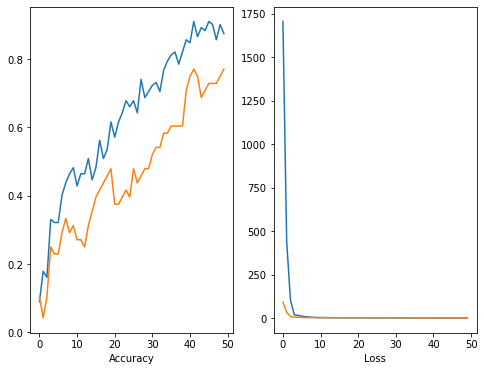

In [54]:
## Plot performance
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='training')
plt.plot(history.history['val_accuracy'],label='validation')
plt.xlabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='training')
plt.plot(history.history['val_loss'],label='validation')
plt.xlabel('Loss')

plt.show()